# Credit Card Default Prediction

In [410]:
#Just easy line to do imports
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pydot

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz

## 1. Importing data

In [411]:
#This gets the data
app_data = pd.read_csv('dataset/application_data.csv') #App data is for their specific application to the data
app_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [412]:
#Just so we know the amount of data we're working with
app_data.shape 

(307511, 122)

## 2. Data Cleaning

In [413]:
#This one is to determine what features we have to change
app_data.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

So we need to adjust 16 columns to be effectively used. Scikit has a built-in for this.

In [414]:
# Extracting the count, size and unique values in each column
app_data.agg(['count', 'size', 'nunique'])

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511,307511,307511,307511,307511,307511,307511,307511,307511,307499,...,307511,307511,307511,307511,265992,265992,265992,265992,265992,265992
size,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,...,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511
nunique,307511,2,2,3,2,2,15,2548,5603,13672,...,2,2,2,2,5,9,9,24,11,25


### 2.1 Identifying missing data

In [415]:
#Calculating the percentage of the missing data in each column
def missing_data(data):
    total = data.isnull().sum() #Total of null values in each column
    percent = (total / data.isnull().count()) * 100
    unique = data.nunique() #Unique values in entire dataset
    datatype = data.dtypes #Finding data types in entire dataset
    return pd.concat([total, percent, unique, datatype], axis=1, keys=['Total', 'MissingPercent', 'Unique', 'Data_Type']).sort_values(by = 'MissingPercent', ascending=False)

In [416]:
metData = missing_data(app_data)
metData.head(30) #Percent represents the percentage of missing data

,Total,MissingPercent,Unique,Data_Type
COMMONAREA_MEDI,214865,69.872297,3202,float64
COMMONAREA_AVG,214865,69.872297,3181,float64
COMMONAREA_MODE,214865,69.872297,3128,float64
NONLIVINGAPARTMENTS_MODE,213514,69.432963,167,float64
NONLIVINGAPARTMENTS_AVG,213514,69.432963,386,float64
NONLIVINGAPARTMENTS_MEDI,213514,69.432963,214,float64
FONDKAPREMONT_MODE,210295,68.386172,4,object
LIVINGAPARTMENTS_MODE,210199,68.354953,736,float64
LIVINGAPARTMENTS_AVG,210199,68.354953,1868,float64
LIVINGAPARTMENTS_MEDI,210199,68.354953,1097,float64


### 2.2 Removing features with high missing data
This one is to get rid of columns with too much missing data. 
We used 56.4% as the cutoff in order to keep EXT_SOURCE_1 feature which is important. If the missing data in a column is greater than the cutoff, then we are getting rid of the feature.

In [417]:
keptColumns = list(metData[(metData.MissingPercent<56.4)].index)
appData = app_data[keptColumns]
appData.describe()
appliData = appData ####???????

After removing the extra features, we go forward with using 99/122 features.

### 2.3 Imputing low missing data

For selecting the low missing data, cutoff chosen is 15%.

#####################??????  Where did you read this and where did you add 0's?

For this we wanted to add 0's to columns with a low amount of missing values. I read this from one of the elitedatascience articles. You don't want columns with too much missing data, otherwise they could effect the outcome.
#####################??????

IMO- Adding mean to the missing values is a better idea- https://machinelearningmastery.com/handle-missing-data-python/

In [418]:
# Extracting the data from the given range 
lowMiss = pd.DataFrame(metData[(metData.MissingPercent > 0) & (metData.MissingPercent<15)])
lowMiss

,Total,MissingPercent,Unique,Data_Type
AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.501631,5,float64
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631,9,float64
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631,9,float64
AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631,24,float64
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631,11,float64
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631,25,float64
NAME_TYPE_SUITE,1292,0.420148,7,object
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.332021,33,float64
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.332021,10,float64
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.332021,33,float64


### 2.4 Replacing objects with numerical data--####??????
What do we do with the object data? Where do we convert it?

In [362]:
#This is so we know the data names for changing to numeric values.
obs = appData.select_dtypes('object').columns 

In [363]:
floats = appData.select_dtypes('float').columns

In [364]:
ints = appData.select_dtypes('int64').columns

In [365]:
# Looking for just 2 unique values
# ###########??????????
appData.select_dtypes('int64').apply(pd.Series.nunique, axis = 0) 

CNT_CHILDREN                       15
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_9                     2
FLAG_DOCUMENT_21                    2
FLAG_DOCUMENT_10                    2
FLAG_DOCUMENT_11                    2
FLAG_DOCUMENT_13                    2
FLAG_DOCUMENT_14                    2
FLAG_DOCUMENT_15                    2
FLAG_DOCUMENT_16                    2
FLAG_DOCUMENT_17                    2
FLAG_DOCUMENT_18                    2
FLAG_DOCUMENT_19                    2
FLAG_DOCUMENT_20                    2
FLAG_DOCUMENT_12                    2
FLAG_PHONE                          2
LIVE_CITY_NOT_WORK_CITY             2
REG_CITY_NOT_WORK_CITY              2
TARGET                              2
REG_CITY_NOT_LIVE_CITY              2
LIVE_REGION_

### 2.5 Converting Flag variables(0/1) to Categorical Variables(N/Y)
Notice a lot of "int" columns have 2 unique values. These are flags or Flag type varibles. Which have no use in bivariate analysis. These can be converted to Yes/No values for categorical analysis.
++++++++++++++++++++^ CHANGE WORDING

In [366]:
# Columns with 2 unique values and data type as 'int64'
cols_to_convert=list(metData[(metData.Unique==2)&(metData.Data_Type=="int64")].index)

In [367]:
#Converts the data types of the columns form (0, 1) to ('N', 'Y')
def convert_data(application_data, cols_to_convert):
    for y in cols_to_convert:
        application_data.loc[:,y].replace((0, 1), ('N', 'Y'), inplace=True)
    return application_data

#calling the function for application_data
appData = convert_data(appData, cols_to_convert)

F:\Downloads\Anaconda\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


### 2.6 Changing the label from (0,1) to (N/Y)

In [368]:
#Converting 'TARGET' label column from (0,1) to ('N','Y') 
appData.TARGET.replace(('N', 'Y'), (0, 1), inplace=True)

Identifying the counts for each data type after the conversions

In [369]:
appData.dtypes.value_counts()

object     47
float64    43
int64       9
dtype: int64

## 3 Data Visualization

Here we analyze the data by plotting certain features for defaulteryto gain an insight to the dataset

### 3.1 Dividing the dataset into Defaulter and Non-Defaulter

In [419]:
defaulter = appData[appData.TARGET==1] #These are who did default
nonDefaulter = appData[appData.TARGET==0] #These are who didn't default
print(defaulter.shape, nonDefaulter.shape)

(24825, 99) (282686, 99)


### 3.2 Plotting Charts

In [371]:
# Got this code snippet from machine learning kernels on kaggle
# https://www.kaggle.com/snehac47/credit-application-case-study

def plot_charts(var, label_rotation,horizontal_layout):
    mpl.style.use('seaborn')
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15,20))
    
    s1=sns.countplot(ax=ax1,x=defaulter[var], data=defaulter, order= defaulter[var].value_counts().index,)
    ax1.set_title('Distribution of '+ '%s' %var +' for Defaulters', fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    s2=sns.countplot(ax=ax2,x=nonDefaulter[var], data=nonDefaulter, order= nonDefaulter[var].value_counts().index,)
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title('Distribution of '+ '%s' %var +' for Non-Defaulters', fontsize=10)
    plt.show()

Obviously, more individuals and organizations are looking for cash loans.

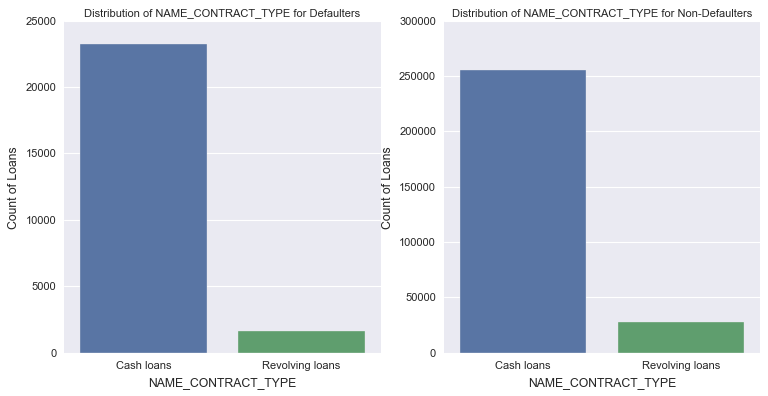

In [372]:
plot_charts('NAME_CONTRACT_TYPE', False, True)

More women were looking for loans than men.

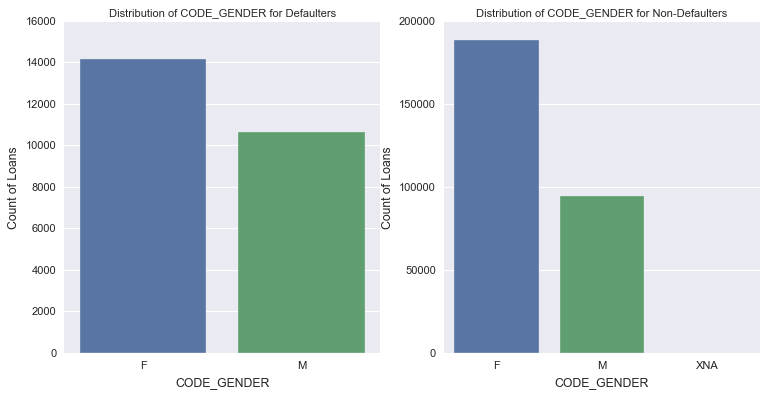

In [373]:
plot_charts('CODE_GENDER', False, True)

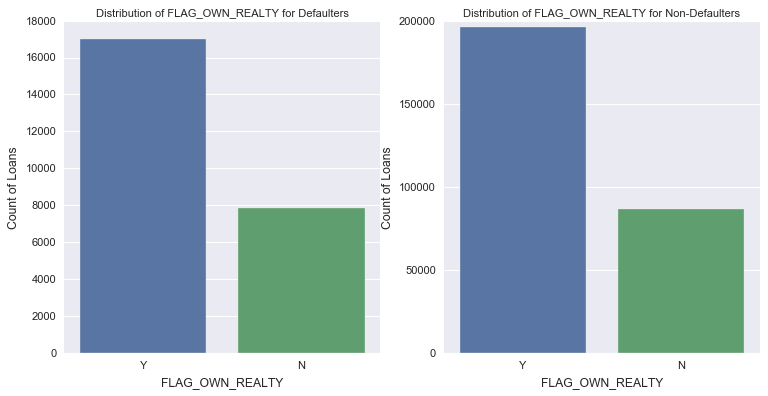

In [374]:
plot_charts('FLAG_OWN_REALTY', False, True)

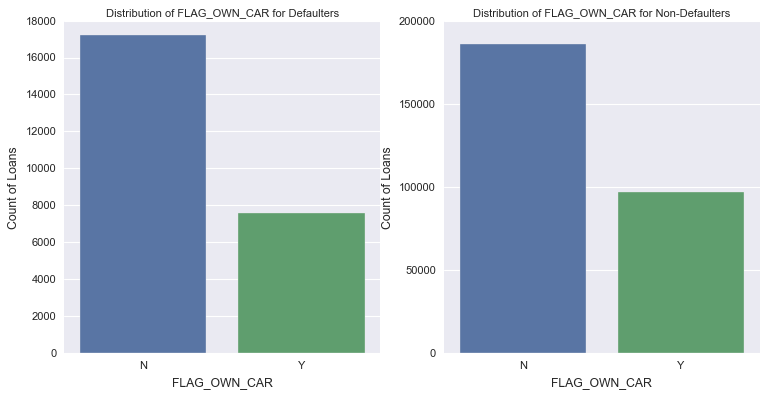

In [375]:
plot_charts('FLAG_OWN_CAR', False, True)

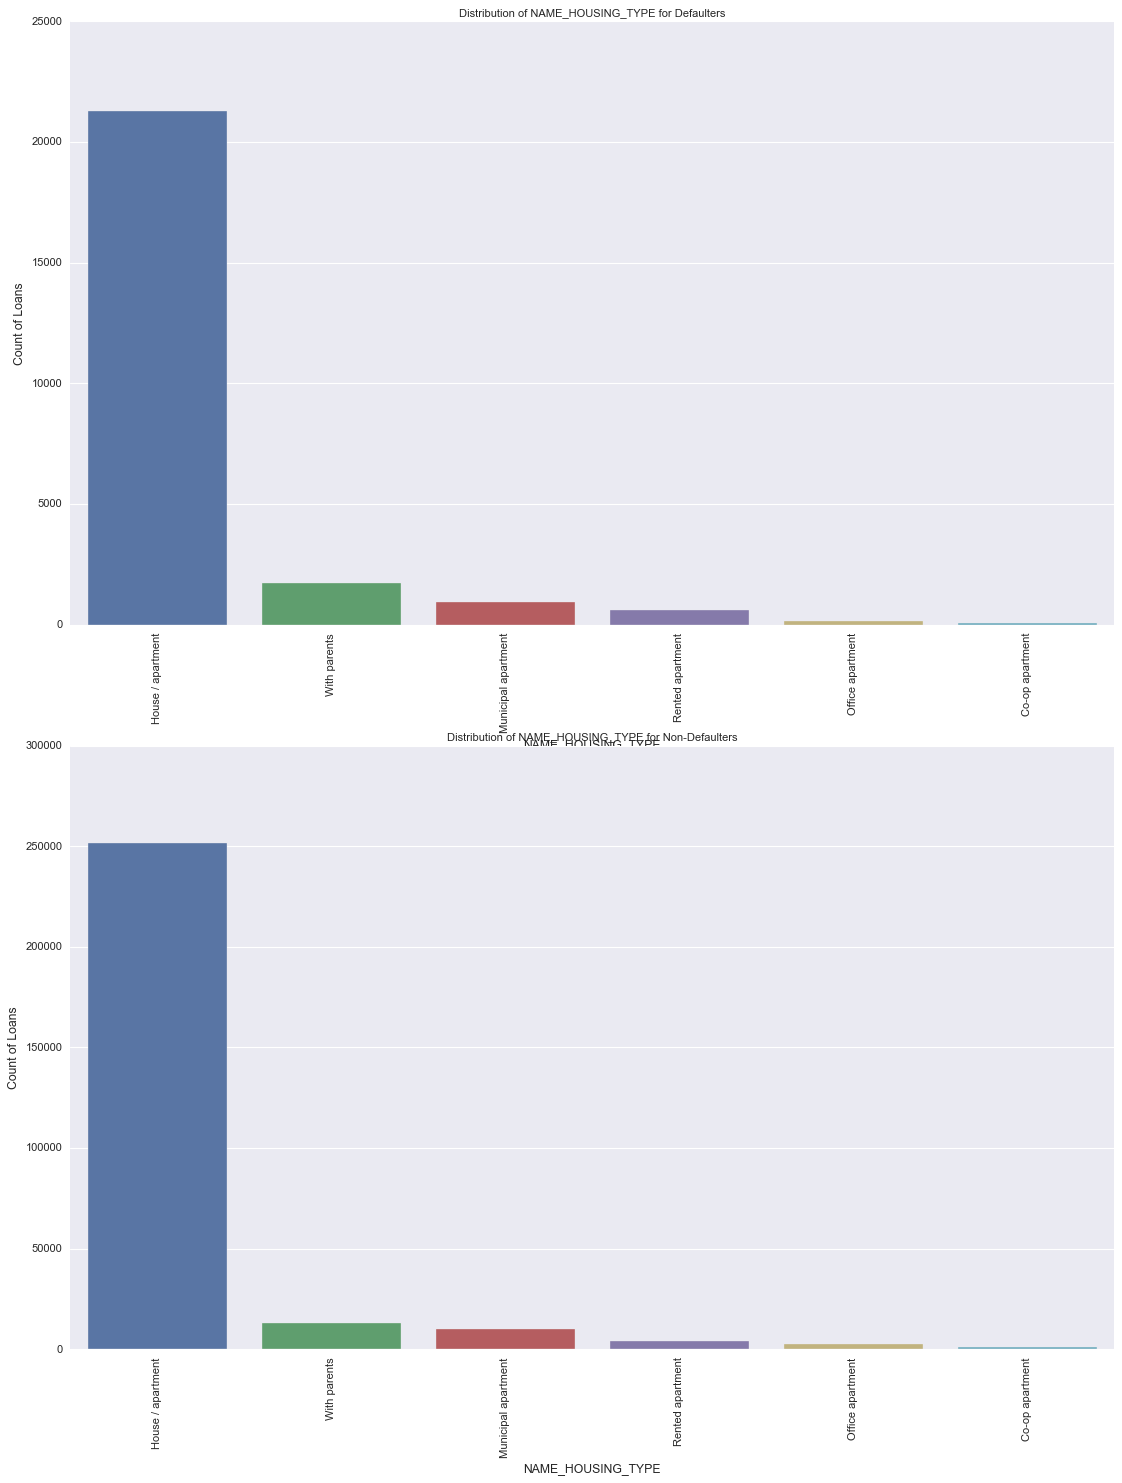

In [376]:
plot_charts('NAME_HOUSING_TYPE', True, False)

Ratio of people who live with parents and default is higher than the non-defaulters. This could be correlated with age, we'll have to look into age to see if that ratio remains similar, as it might just be an insight that younger people tend to default more.

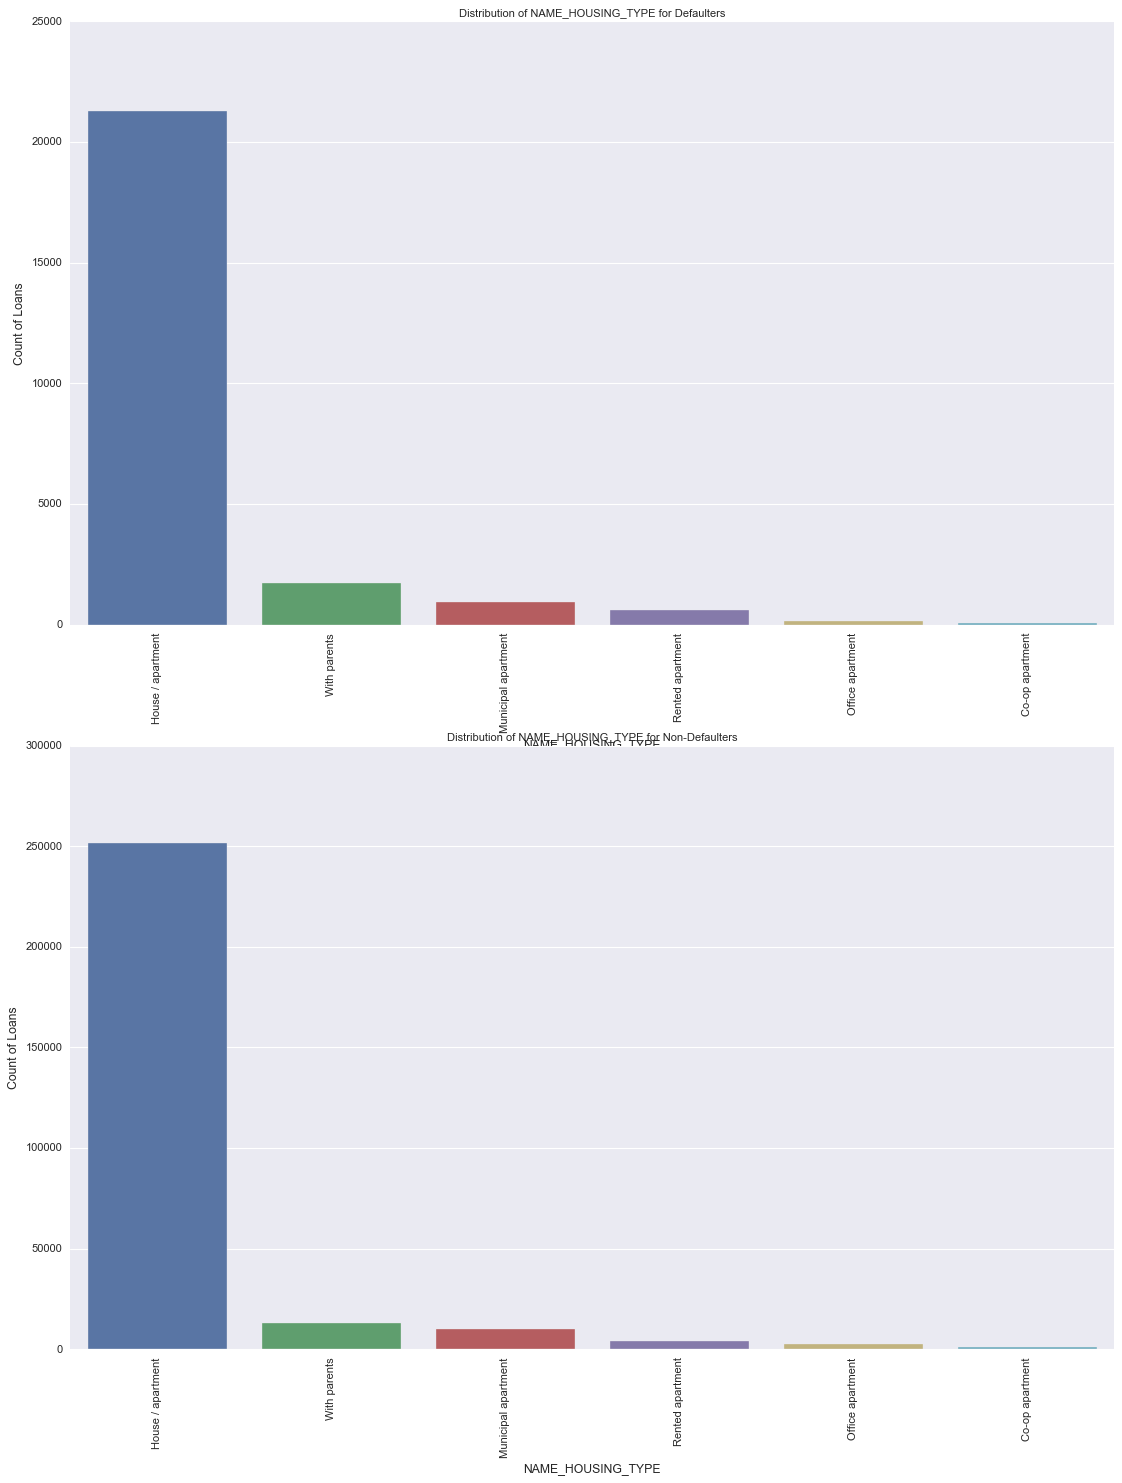

In [377]:
plot_charts('NAME_HOUSING_TYPE', True, False)

F:\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


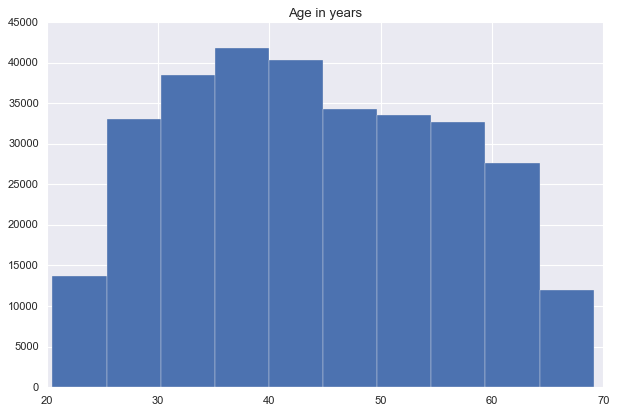

In [378]:
appData['AGE'] = appData['DAYS_BIRTH'] / -365
plt.hist(appData['AGE'])
plt.title('Age in years')
plt.show()

Now I want to see who is looking for loans, as well as what types of businesses are looking for loans.

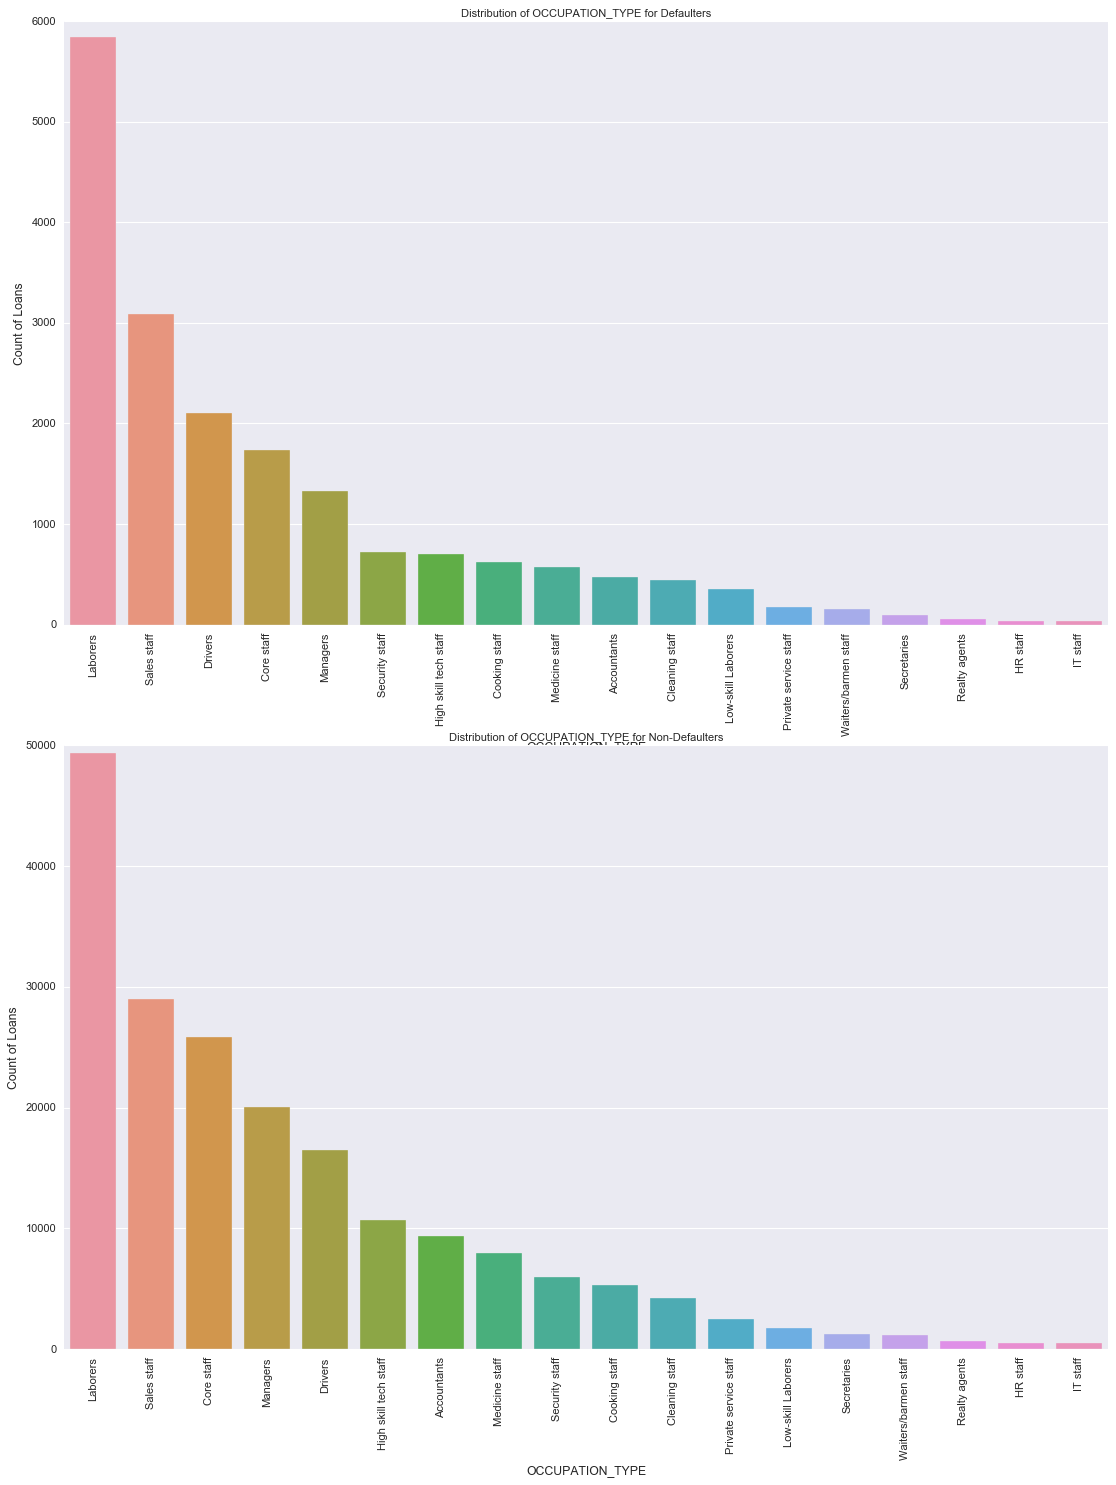

In [379]:
plot_charts('OCCUPATION_TYPE', True, False)

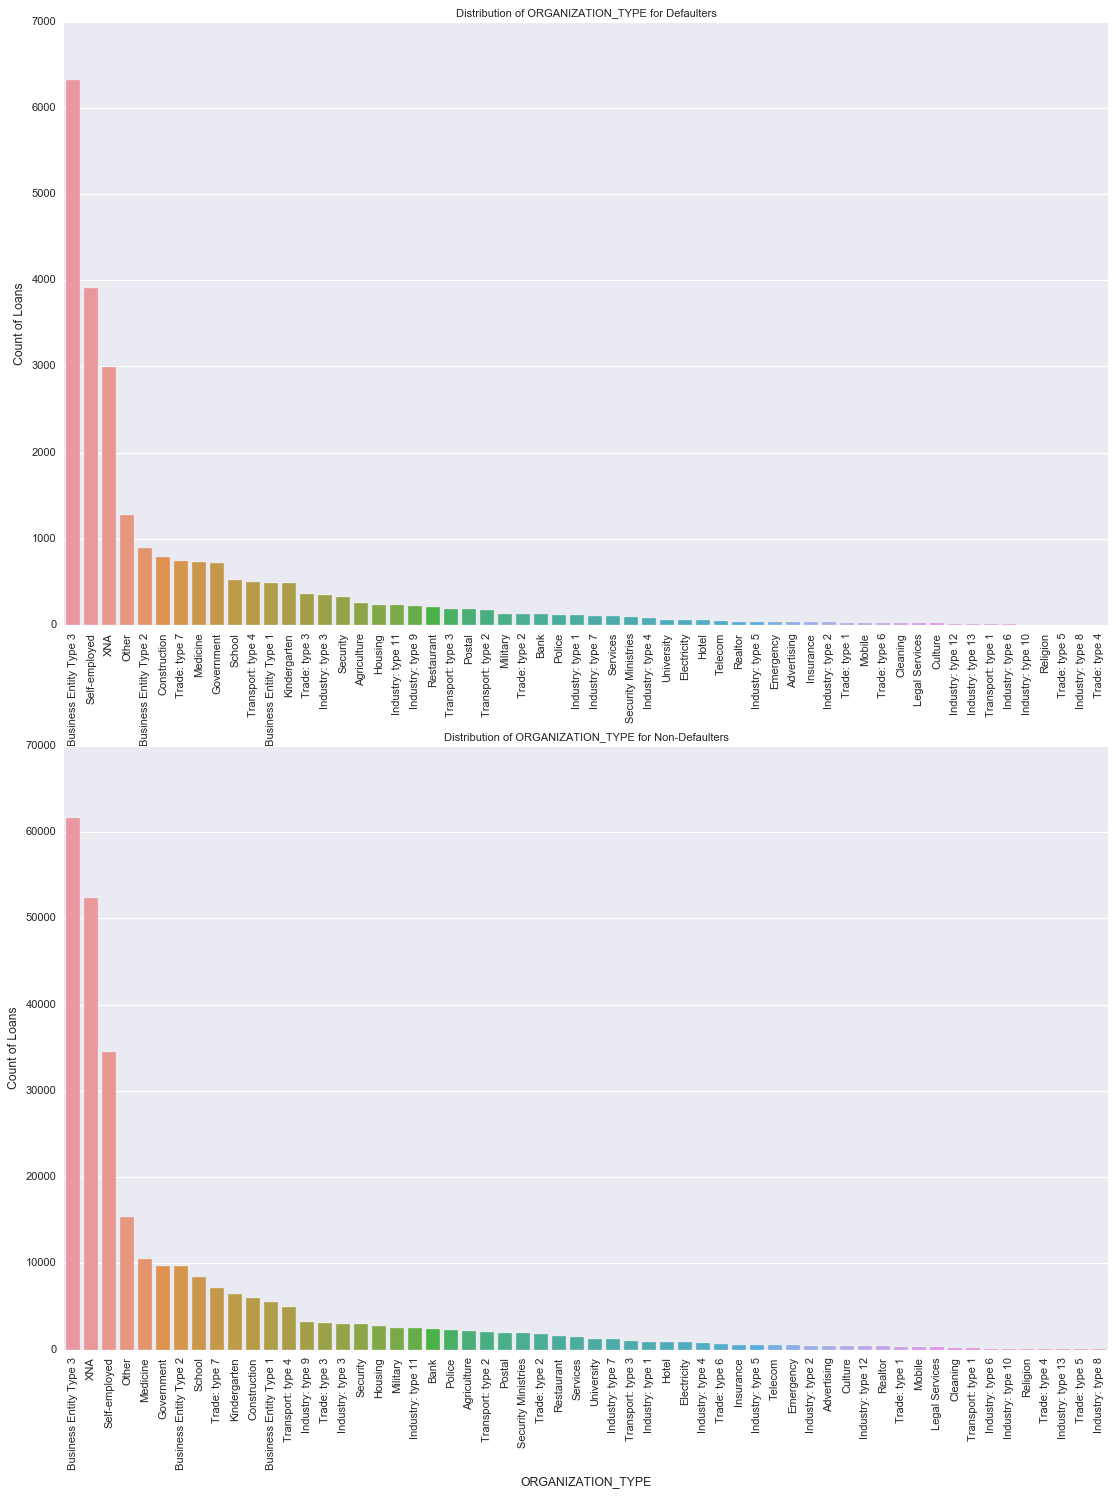

In [380]:
plot_charts('ORGANIZATION_TYPE', True, False)

## 4. Removing Outliers

In [381]:
#Plotting histogram and box plot for a given feature to the function
def plot_boxhist(var):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    s=sns.boxplot(y=defaulters[var]);
    plt.title('Box Plot of '+ '%s' %var +' for Defaulters', fontsize=10)
    plt.xlabel('%s' %var)
    plt.ylabel("Count of Loans")
    plt.subplot(1, 2, 2)
    s=plt.hist(x=defaulters[var]);
    plt.xlabel('%s' %var)
    plt.ylabel("Count of Loans")
    plt.title('Histogram of '+ '%s' %var +' for Defaulters', fontsize=10)
    plt.show()

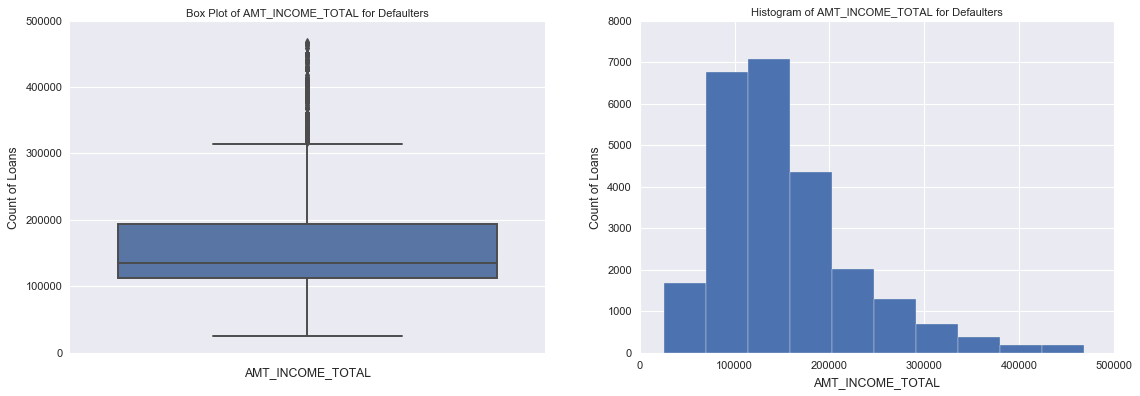

In [382]:
# Graphing before any outlier removal
plot_boxhist('AMT_INCOME_TOTAL')

In [383]:
############## Graph before and after are the same.
############## Can you break line 5 into 2 as it doesn't make sense?

#Removing all entries above 99 percentile
appData = appData[appData.AMT_INCOME_TOTAL<np.nanpercentile(appData['AMT_INCOME_TOTAL'], 99)]
#update defaulters and non-defaulters
defaulters=appData[appData.TARGET==1] 
nondefaulters=appData[appData.TARGET==0]

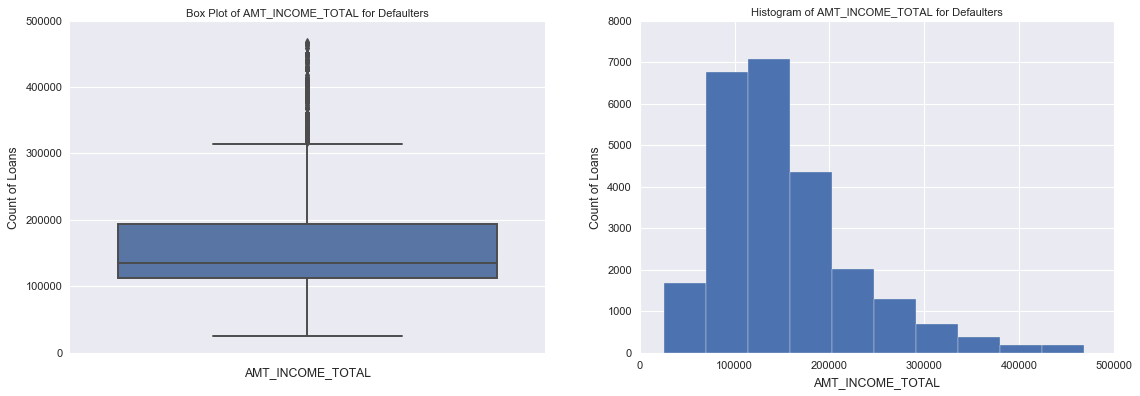

In [384]:
# Graphing after the outlier removal
plot_boxhist('AMT_INCOME_TOTAL')

In [385]:
################??? Documentation

defaulter.loc[:,'INCOME_BRACKET']=pd.qcut(appData.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.10,0.35,0.50,0.90,1], labels=['Very_low','Low','Medium','High','Very_high'])
nonDefaulter.loc[:,'INCOME_BRACKET']=pd.qcut(appData.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.10,0.35,0.50,0.90,1], labels=['Very_low','Low','Medium','High','Very_high'])

F:\Downloads\Anaconda\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
F:\Downloads\Anaconda\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


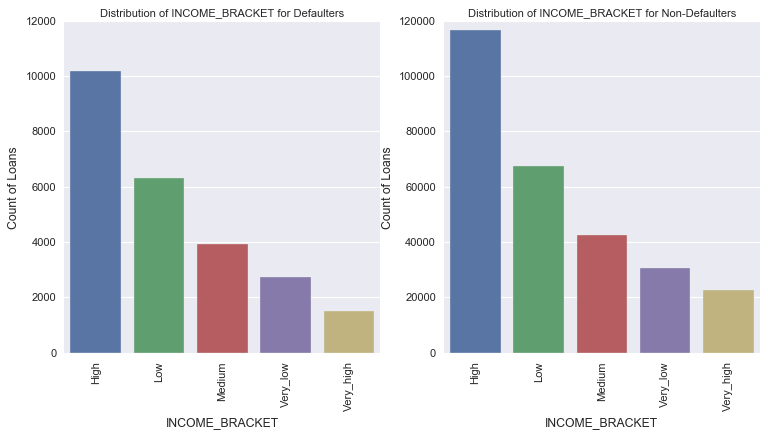

In [386]:
plot_charts('INCOME_BRACKET', True, True)

As we can see, everything follows about the same pattern, but with more low income people defaulting, and more very high income people not defaulting. 

In [387]:
le = preprocessing.LabelEncoder()

In [388]:
################??? Documentation

for CName in appData.drop('TARGET', axis = 1).columns:
    if type(appData[CName][1]) == str:
        appData[CName] = appData[CName].fillna("Unknown")
    else:
        appData[CName] = appData[CName].fillna(appData[CName].mean(), inplace=True)
    if CName == 'TARGET':
        print("It was here")
    else:
        appData[CName] = le.fit_transform(appData[CName])

F:\Downloads\Anaconda\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
F:\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
F:\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/ind

### Data Split into Test and Training dataset
########???? Why don't we have a Val data set?

In [396]:
labels = appData['TARGET']
feats = appData.drop('TARGET', axis = 1)
features = list(feats.columns) ####??? Do you use it anywhere?
feats = np.array(feats)

In [397]:
######???? Does this account for the inconsistency in data??
trainFeat, testFeat, trainLabel, testLabel = train_test_split(feats, labels, test_size = 0.25, random_state = 2)

In [398]:
print(trainFeat.shape, testFeat.shape, trainLabel.shape, testLabel.shape)

(228312, 99) (76105, 99) (228312,) (76105,)


## Random Forest Model

In [399]:
# Model training
rf = RandomForestClassifier(n_estimators = 1000, max_depth = 4)
rf.fit(trainFeat, trainLabel)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [400]:
# Model predicting 
predictions = rf.predict(testFeat)
print(np.average(predictions == testLabel))

0.9188489586755141


In [405]:
############??? Documentation needed

tree = rf.estimators_[20]
export_graphviz(tree, out_file = 'tree.dot', feature_names = appData.drop('TARGET', axis=1).columns, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

<img src="tree.png" width="2160" height="700"/>

## Logistic Regression Model

In [406]:
feat = preprocessing.scale(trainFeat)

In [407]:
reg = LogisticRegression(random_state = 0).fit(feat, trainLabel)
preds = reg.predict(testFeat)

F:\Downloads\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [408]:
print(np.average(preds == testLabel))
pred2 = reg.predict(trainFeat) #####?? Why running over training dataset?
print(np.average(pred2 == trainLabel))

0.8981538663688325
0.8979072497284418
